<a href="https://colab.research.google.com/github/Darshan0805/Natural-Language-Processing/blob/main/Sai_Darshan_48_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
data=pd.read_csv('/content/seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


Preprocessing

In [8]:
import numpy as np
import scipy.stats as stats
def drop_outlier(data,col_name):
    z= np.abs(stats.zscore(col_name))
    data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
drop_outlier(data,data['precipitation'])
drop_outlier(data,data['temp_max'])
drop_outlier(data,data['temp_min'])
drop_outlier(data,data['wind'])
data=data.drop(columns='date')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in data.drop(columns='weather').columns:
    data[i]=sc.fit_transform(data[[i]])
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,-0.503221,-0.540252,-0.679922,1.265942,drizzle
1,2.239635,-0.840696,-1.123174,1.108110,rain
2,-0.301911,-0.690474,-0.236670,-0.628046,rain
4,-0.176092,-1.072858,-1.123174,2.370769,rain
5,0.125874,-1.687403,-1.244060,-0.706962,rain


In [9]:
X=data.drop(columns='weather')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(data['weather'])
from tensorflow.keras.utils import to_categorical
Y= to_categorical(Y)
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.2)

In [10]:
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Input
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Input(shape=(X_train.shape[1],1)))
model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 32)             4352      
                                                                 
 dropout (Dropout)           (None, 4, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             24832     
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 5)                 6

In [13]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=50,validation_data=(X_val, Y_val))

Epoch 1/50
35/35 [==============================] - 6s 34ms/step - loss: 1.4576 - accuracy: 0.4580 - val_loss: 1.1207 - val_accuracy: 0.4562
Epoch 2/50
35/35 [==============================] - 1s 15ms/step - loss: 1.1383 - accuracy: 0.4489 - val_loss: 1.1106 - val_accuracy: 0.5365
Epoch 3/50
35/35 [==============================] - 1s 27ms/step - loss: 1.1177 - accuracy: 0.4681 - val_loss: 1.0876 - val_accuracy: 0.4161
Epoch 4/50
35/35 [==============================] - 1s 27ms/step - loss: 1.0880 - accuracy: 0.4808 - val_loss: 1.0531 - val_accuracy: 0.4854
Epoch 5/50
35/35 [==============================] - 1s 23ms/step - loss: 1.0591 - accuracy: 0.5511 - val_loss: 1.0050 - val_accuracy: 0.5657
Epoch 6/50
35/35 [==============================] - 1s 16ms/step - loss: 0.9872 - accuracy: 0.6332 - val_loss: 0.8963 - val_accuracy: 0.6825
Epoch 7/50
35/35 [==============================] - 1s 16ms/step - loss: 0.8486 - accuracy: 0.7153 - val_loss: 0.7580 - val_accuracy: 0.7299
Epoch 8/50
35

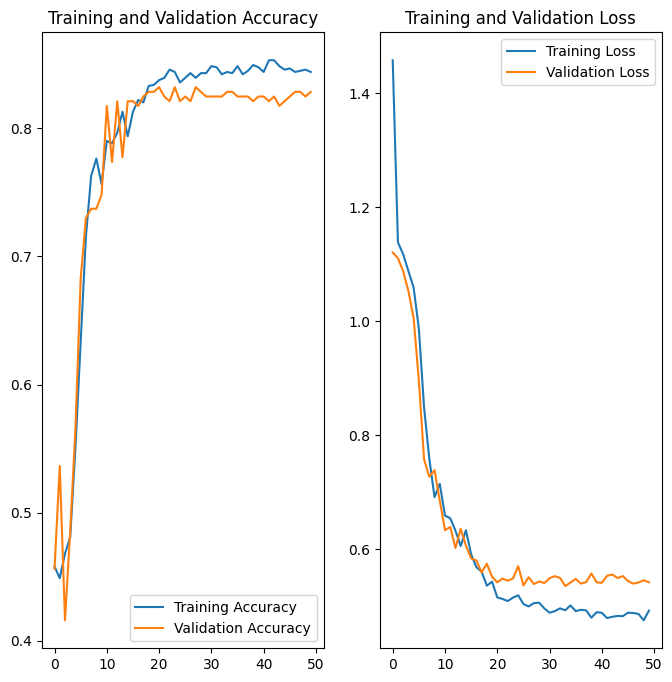

In [14]:

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=5c103dd1d5a19ac3ec1e37cc0c9b324ded03b038883e43d0ff17945fdcb23b2b
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [1]:
import nltk
from googletrans import Translator
from googletrans import Translator

In [2]:

def translate_text(text, source_lang, dest_lang):
    translator = Translator()
    translated = translator.translate(text, src=source_lang, dest=dest_lang)
    return translated.text

In [5]:
input_text = "This subject is NLP"
translated_text = translate_text(input_text,'english','kannada')
print("Translated Text:", translated_text)

Translated Text: ಈ ವಿಷಯ NLP ಆಗಿದೆ
